In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/makemore-names-txt/names.txt


In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import names as input list:
lines_list = []
with open("/kaggle/input/makemore-names-txt/names.txt") as file:
    lines_list = [line.strip() for line in file]

In [4]:
# prepare vocab
vocab_list = sorted(list(set(''.join(lines_list))))
itos = {}
stoi = {}
for i in range(1,27):
    itos.update({i: vocab_list[i-1]})
itos[0] = '.'
stoi = {i:j for j, i in itos.items()}
print(stoi)
print(itos)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
# prepare dataset of input and output characters (bigram)
dataset_x_list = []
dataset_y_list = []
context_size = 3
for name in lines_list:
    context = [0]*context_size
    for i in (list(name) + ['.']):
        iy = stoi[i]
        dataset_x_list.append(context)
        dataset_y_list.append(iy)
        # print(''.join(itos[k] for k in context), i)
        context = context[1:] + [iy]
print(len(dataset_x_list), len(dataset_y_list))
# print([(i, j) for i, j in zip(dataset_x_list, dataset_y_list)])

228146 228146


In [6]:
# initialize unit value class
# class Value:

#     def __init__(self, data, grad=None):
#         self.data = data
#         self.grad = grad

#     def __repr__(self):
#         return f"Value(data={self.data})"

#     def __add__(self, other):
#         return self.data + other.data

#     def __mul__(self, other):
#         return self.data * other.data

In [7]:
# layers and parameters
X = torch.tensor(dataset_x_list)
Y = torch.tensor(dataset_y_list)
print(X.shape, X.dtype, Y.shape, Y.dtype)

torch.Size([228146, 3]) torch.int64 torch.Size([228146]) torch.int64


In [8]:
# initialize embeddings table
n_embed = 10
C = torch.randn([27, n_embed])

In [9]:
# initial weights and biases
# first layer
W1 = torch.randn((context_size*n_embed, 200))
B1 = torch.randn(200)
# second layer
W2 = torch.randn((200, 27))
B2 = torch.randn(27)
parameters = [C, W1, B1, W2, B2]
learning_rate = 0.1

In [10]:
# set grad true for all params
for p in parameters:
    p.requires_grad = True

In [11]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [12]:
# forward pass
lossl = []
lrsl = []

for i in range(30000):
    # mini batch
    ix = torch.randint(0, X.shape[0], (32,))
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1,context_size*n_embed) @ W1 + B1)
    logits = h @ W2 + B2
    loss = F.cross_entropy(logits, Y[ix])

    # backward pass
    for p in parameters:
        p.grad = None
    # calculate gradients
    loss.backward()
    # udpate params based on gradients
    lr = 0.01
    for p in parameters:
        p.data += -lr* p.grad
    lrsl.append(i)
    lossl.append(loss.item())

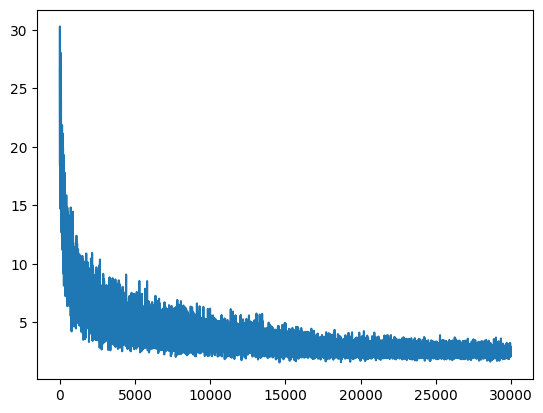

In [13]:
plt.plot(lrsl, lossl)

In [14]:
loss.item()

2.3237998485565186

In [15]:
# sample
g = torch.Generator().manual_seed(343439843 + 10)
for _ in range(20):
    out = []
    context = [0] * context_size
    # print(context)
    while True:
        emb = C[torch.tensor([context])]
        # print(emb.shape)
        h = torch.tanh(emb.view(1, -1) @ W1 + B1)
        logits = h @ W2 + B2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix==0:
            break
    print(''.join(itos[k] for k in out))

kanaayexttia.
anaryane.
daellah.
amy.
sora.
tavyva.
duie.
sova.
lil.
phe.
dac.
tasai.
ziaavanesa.
alie.
nyfrrish.
legio.
shalynn.
theli.
evole.
aryvangelalontiegna.
